## Import Dependencies

In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json
import requests

# Educationdata.urban.org
## Postsecondary Enrollment Headcounts

In [2]:
# Get higher ed headcounts from api
ipeds_baseurl = 'https://educationdata.urban.org/api/v1/college-university/ipeds/enrollment-headcount/summaries?'
params = {
    'var': 'headcount',
    'stat': 'sum',
    'by': 'unitid',
    # 1—Undergraduate 2—Graduate 3—First professional 4—Postbaccalaureate 99—Total
    'level_of_study': '1',
    'year': ''
}

# Years to loop through and dictionary to store data retrieved
years = ['2017', '2018', '2019', '2020', '2021']
undergrad_headcount_data = {}

for year in years:
    params['year'] = year
    print(f'Getting {year} data.')
    response = requests.get(ipeds_baseurl, params=params)
    data = response.json()
    
    # Store data for each year searched in dict with the key being that year
    undergrad_headcount_data[f'{year}'] = pd.DataFrame(data['results'])['headcount'].sum()

undergrad_series = pd.Series(undergrad_headcount_data, name='Enrolled in Undergrad')
undergrad_series

Getting 2017 data.
Getting 2018 data.
Getting 2019 data.
Getting 2020 data.
Getting 2021 data.


2017    22962495
2018    22723047
2019    22723047
2020    22525259
2021    21687926
Name: Enrolled in Undergrad, dtype: int64

In [3]:
# Change params to total postsecondary students
params['level_of_study'] = 99

total_headcount_data = {}

for year in years:
    params['year'] = year
    print(f'Getting {year} data.')
    response = requests.get(ipeds_baseurl, params=params)
    data = response.json()
    total_headcount_data[f'{year}'] = pd.DataFrame(data['results'])['headcount'].sum()

total_ps_series = pd.Series(total_headcount_data, name='Total Enrolled in Postsecondary')
total_ps_series

Getting 2017 data.
Getting 2018 data.
Getting 2019 data.
Getting 2020 data.
Getting 2021 data.


2017    26887067
2018    26685592
2019    26685592
2020    26497087
2021    25762172
Name: Total Enrolled in Postsecondary, dtype: int64

In [4]:
# Concat data into one dataframe
ps_df = pd.concat([
    undergrad_series,
    total_ps_series],
    axis=1
)
ps_df

,Enrolled in Undergrad,Total Enrolled in Postsecondary
2017,22962495,26887067
2018,22723047,26685592
2019,22723047,26685592
2020,22525259,26497087
2021,21687926,25762172


In [5]:
# Difference between Total and Undergrads
ps_df['Enrolled Past Undergrad'] = ps_df['Total Enrolled in Postsecondary']-ps_df['Enrolled in Undergrad']
ps_df = ps_df[['Enrolled in Undergrad', 'Enrolled Past Undergrad', 'Total Enrolled in Postsecondary']]
ps_df
# Not used because possibility of total including erroneous data

,Enrolled in Undergrad,Enrolled Past Undergrad,Total Enrolled in Postsecondary
2017,22962495,3924572,26887067
2018,22723047,3962545,26685592
2019,22723047,3962545,26685592
2020,22525259,3971828,26497087
2021,21687926,4074246,25762172


## Completed Higher Ed counts

In [6]:
# Get graduate info from api
baseurl = 'https://educationdata.urban.org/api/v1/college-university/ipeds/completers/summaries?'

params = {
    'var': 'completers',
    'stat': 'sum',
    'by': 'unitid',
    'year': ''
}

years = ['2017', '2018', '2019', '2020', '2021']
completers_data = {}

for year in years:
    params['year'] = year
    print(f'Getting {year} data.')
    response = requests.get(baseurl, params=params)
    data = response.json()['results']
    df = pd.DataFrame(data)
    completers_data[f'{year}'] = df['completers'].sum()

completers_series = pd.Series(completers_data, name='Completed Higher Ed')
completers_series

# 2019 and 2020 seem to be duplicate data

Getting 2017 data.
Getting 2018 data.
Getting 2019 data.
Getting 2020 data.
Getting 2021 data.


2017    4720982
2018    4765256
2019    4742858
2020    4742858
2021    4843181
Name: Completed Higher Ed, dtype: int64

## Fall Retention Rates

In [7]:
# Get retention info from api
baseurl = 'https://educationdata.urban.org/api/v1/college-university/ipeds/fall-retention/summaries?'

params = {
    'var': 'retention_rate',
    'stat': 'avg',
    'by': 'ftpt',
    'year': ''
}

years = ['2017', '2018', '2019', '2020']
retention_data = {}

for year in years:
    params['year'] = year
    print(f'Getting {year} data.')
    response = requests.get(baseurl, params=params)
    data = response.json()['results']
    datadict = {}
    datadict['Full-Time Fall Retention'] = data[0]['retention_rate']
    datadict['Part-Time Fall Retention'] = data[1]['retention_rate']
    datadict['Avg Fall Retention'] = data[2]['retention_rate']
    retention_data[f'{year}'] = datadict

retention_df = pd.DataFrame(retention_data)
retention_df = retention_df.transpose()
retention_df

# Seems to be no strong change

Getting 2017 data.
Getting 2018 data.
Getting 2019 data.
Getting 2020 data.


,Full-Time Fall Retention,Part-Time Fall Retention,Avg Fall Retention
2017,0.704055,0.505465,0.683817
2018,0.706103,0.509421,0.687010
2019,0.714044,0.516850,0.696807
2020,0.706521,0.510495,0.688849


## K-12 enrollment data

In [8]:
# Get K-12 headcounts from api
baseurl = 'https://educationdata.urban.org/api/v1/schools/ccd/enrollment/summaries?'

params = {
    'var': 'enrollment',
    'stat': 'sum',
    'by': 'grade',
    'year': ''
}

years = ['2017', '2018', '2019', '2020']
# dict to be made into dataframe later, keys are years
enrollment_by_grade = {}

for year in years:
    params['year'] = year
    print(f'Getting {year} data.')
    response = requests.get(baseurl, params=params)
    data = response.json()
    
    # nested dict for each series, keys are grades
    enrollment = {}
    
    for x in data['results']:
        grade = x['grade']
        enrollment[f'{grade}'] = x['enrollment']
    
    # insert data for each grade into complete dict
    enrollment_by_grade[f'{year}'] = enrollment
    
enrollment_by_grade

Getting 2017 data.
Getting 2018 data.
Getting 2019 data.
Getting 2020 data.


{'2017': {'-1': 1255505,
  '0': 3710571,
  '1': 3697231,
  '2': 3711904,
  '3': 3816334,
  '4': 3887802,
  '5': 3905590,
  '6': 3854926,
  '7': 3805355,
  '8': 3798345,
  '9': 4018689,
  '10': 3855133,
  '11': 3695341,
  '12': 3640445,
  '13': 1778,
  '14': 7109,
  '15': 135046,
  '99': 50797126},
 '2018': {'-1': 1318877,
  '0': 3702779,
  '1': 3666344,
  '2': 3678424,
  '3': 3732953,
  '4': 3802452,
  '5': 3901341,
  '6': 3916316,
  '7': 3872358,
  '8': 3811121,
  '9': 4025850,
  '10': 3866284,
  '11': 3667744,
  '12': 3654021,
  '13': 1787,
  '14': 6463,
  '15': 125961,
  '99': 50751092},
 '2019': {'-1': 1360941,
  '0': 3737937,
  '1': 3669432,
  '2': 3661781,
  '3': 3709415,
  '4': 3728758,
  '5': 3824609,
  '6': 3919004,
  '7': 3940340,
  '8': 3884860,
  '9': 4065478,
  '10': 3885743,
  '11': 3685420,
  '12': 3624904,
  '13': 1803,
  '14': 4467,
  '15': 127450,
  '99': 50833994},
 '2020': {'-1': 1080497,
  '0': 3391418,
  '1': 3538666,
  '2': 3545463,
  '3': 3568901,
  '4': 3624353

In [9]:
# Cleanup, format, and create k-12 enrollment df
grade_numbers = ['-1','1','2','3','4','5','6','7','8','9','10','11','12']
grade_strings = ['Enrolled in K', 'Enrolled in 1st', 'Enrolled in 2nd', 'Enrolled in 3rd', 'Enrolled in 4th', 'Enrolled in 5th', 'Enrolled in 6th', 'Enrolled in 7th', 'Enrolled in 8th', 'Enrolled in 9th', 'Enrolled in 10th', 'Enrolled in 11th', 'Enrolled in 12th']
grade_dict = dict(zip(grade_numbers, grade_strings))

k_12_enrollmentdata = pd.DataFrame(enrollment_by_grade)
k_12_enrollmentdata = k_12_enrollmentdata.transpose()
k_12_enrollmentdata = k_12_enrollmentdata[grade_numbers]
k_12_enrollmentdata = k_12_enrollmentdata.rename(columns=grade_dict)

k_12_enrollmentdata

,Enrolled in K,Enrolled in 1st,Enrolled in 2nd,Enrolled in 3rd,Enrolled in 4th,Enrolled in 5th,Enrolled in 6th,Enrolled in 7th,Enrolled in 8th,Enrolled in 9th,Enrolled in 10th,Enrolled in 11th,Enrolled in 12th
2017,1255505,3697231,3711904,3816334,3887802,3905590,3854926,3805355,3798345,4018689,3855133,3695341,3640445
2018,1318877,3666344,3678424,3732953,3802452,3901341,3916316,3872358,3811121,4025850,3866284,3667744,3654021
2019,1360941,3669432,3661781,3709415,3728758,3824609,3919004,3940340,3884860,4065478,3885743,3685420,3624904
2020,1080497,3538666,3545463,3568901,3624353,3663730,3765069,3878814,3907716,4031746,3912087,3714309,3665497


In [10]:
# Put together all higher ed data into one csv
complete_ps_df = pd.concat([ps_df,
                            completers_series,
                            retention_df],
                           axis=1)
complete_ps_df.index.name = 'Year'
complete_ps_df.to_csv("CSVfiles/postsecondary_data.csv", encoding="utf-8", index=True)

In [11]:
# export k-12 as csv
k_12_enrollmentdata.index.name = 'Year'
k_12_enrollmentdata.to_csv("CSVfiles/k_12_data.csv", encoding="utf-8", index=True)

In [12]:
df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")
df = df[(df['Location'] == 'United States of America') & (df['Time'].isin([2018,2019,2020, 2021]))][['Location', 'Time', 'Deaths']]
df

C:\Users\carso\AppData\Local\Temp\ipykernel_9788\2645720572.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")


,Location,Time,Deaths
39132,United States of America,2018,2780.175
39133,United States of America,2019,2778.148
39134,United States of America,2020,3238.518
39135,United States of America,2021,3280.682


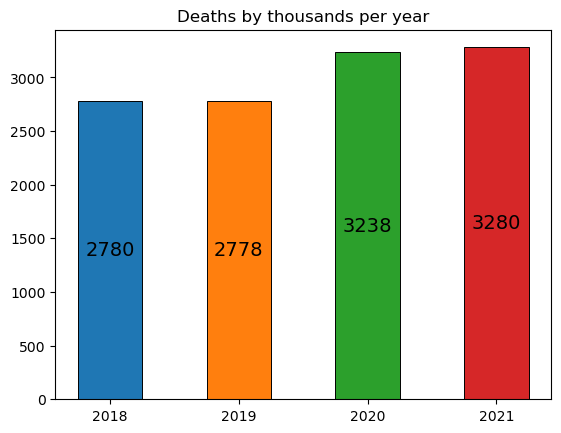

In [13]:
fig, ax = plt.subplots()

df_grouped = df.groupby('Time')
for time, group in df_grouped:
    c = ax.bar(group['Time'], group['Deaths'], width= 0.5, edgecolor= 'black', linewidth= 0.7, label=str(time))
    labels = [str(int(val)) for val in group['Deaths']]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)

plt.xticks(df['Time'])
plt.title("Deaths by thousands per year")
plt.show()

In [14]:
# Read the CSV file into a data frame
df2 = pd.read_csv("CSVfiles/WHO-COVID-19-global-data.csv")

# Filter the data frame to only include the countries of interest
countries = ['China', 'India', 'United States of America', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Mexico']
df2 = df2[df2['Country'].isin(countries)]

# Sort the data frame based on 'Country' and 'New_cases' in ascending and descending order respectively
df2 = df2.sort_values(by=['Country', 'New_cases'], ascending=[True, False])

# Drop duplicate entries for each country and keep only the first (highest) entry
df2 = df2.drop_duplicates(subset='Country', keep='first')

# Select only the 'Country', 'New_cases', and 'Date_reported' columns
df2 = df2[['Country', 'New_cases', 'Date_reported']]

# Rename the columns
df2.columns = ['Country', 'Highest New Cases', 'Date_reported']

# Set the index of the data frame to be the 'Country' column
df2.set_index('Country', inplace=True)

# Show the resulting data frame
df2['Date_reported'] = pd.to_datetime(df2['Date_reported'], format='%Y-%m-%d')
df2.sort_values(by='Date_reported', inplace=True)
df2

,Highest New Cases,Date_reported
Country,,
India,414188,2021-05-07
Bangladesh,16230,2021-07-28
Nigeria,4035,2021-12-23
United States of America,1265520,2022-01-12
Mexico,81266,2022-01-19
Pakistan,8183,2022-01-29
Brazil,298408,2022-02-05
Russian Federation,203949,2022-02-11
Indonesia,64718,2022-02-16


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

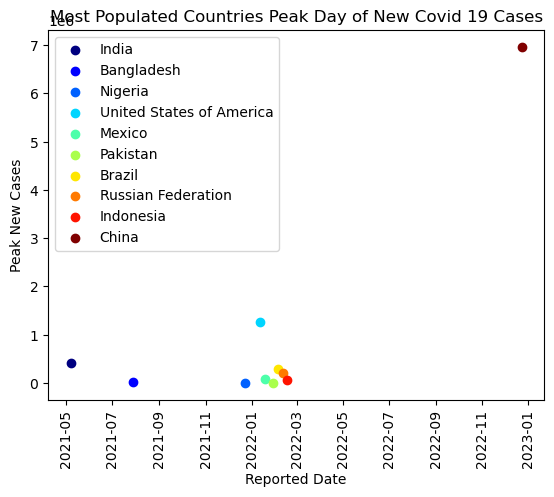

In [15]:
# Create a list of scatter plots with different colors for each country
scatters = []
for i, country in enumerate(df2.index):
    scatters.append(plt.scatter(df2.loc[country, 'Date_reported'], df2.loc[country, 'Highest New Cases'], c=plt.cm.jet(np.linspace(0,1,len(df2)))[i], label=country))

# Add labels for the x-axis and y-axis
plt.xticks(rotation=90) 
plt.xlabel('Reported Date')
plt.ylabel('Peak New Cases')
plt.title('Most Populated Countries Peak Day of New Covid 19 Cases')
# Create the legend
plt.legend(handles=scatters)
# Show the plot
plt.show()